<a href="https://colab.research.google.com/github/EllenBonafin/machine-learning/blob/main/ML3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas

In [19]:
import sklearn
import pandas as pd

import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.neural_network import MLPRegressor
#from yellowbrick.regressor import ResidualsPlot
from sklearn import datasets # dataset exemplo
from sklearn.model_selection import train_test_split #divisao da base
from sklearn.svm import SVR #SVR
from sklearn.metrics import mean_squared_error #RMSE
from math import sqrt #RAIZ QUADRADA
from sklearn.ensemble import RandomForestRegressor #RF
import statsmodels.formula.api as sm

import numpy as np

from sklearn.datasets import load_boston
boston_dataset = load_boston()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [26]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston_parm = pd.DataFrame(boston, columns=boston.columns[:])
boston.head()
boston



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [27]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

Divisão dos dados

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 2)
(152, 2)
(354,)
(152,)


Correlação

In [ ]:
X = base.iloc[:,0].values    #CRIM: Taxa de criminalidade per capita por cidade
Y = base.iloc[:,1].values    #ZN: Proporção de terrenos residenciais zoneados para lotes acima de 25.000 pés quadrados
Z = base.iloc[:,2].values    #INDUS: Proporção de acres de negócios não varejistas por cidade 
D = base.iloc[:,3].values    #CHAS: Variável dummy Charles River (= 1 se o trato limita o rio; 0 caso contrário)
E = base.iloc[:,4].values    #NOX: Concentração de óxido nítrico (partes por 10 milhões)
F = base.iloc[:,5].values    #RM: Número médio de cômodos por residência
G = base.iloc[:,6].values    #AGE: Proporção de unidades ocupadas pelos proprietários construídas antes de 1940
H = base.iloc[:,7].values    #DIS: Distâncias ponderadas a cinco centros de emprego de Boston
I = base.iloc[:,8].values    #RAD: Índice de acessibilidade a rodovias radiais
J = base.iloc[:,9].values    #TAX: Taxa de imposto predial de valor total por $ 10.000
K = base.iloc[:,10].values   #PTRATIO: Proporção aluno-professor por cidade
L = base.iloc[:,11].values   #B: 1.000(Bk — 0,63 )², onde  Bk é a proporção de [pessoas de ascendência afro-americana] por cidade
M = base.iloc[:,12].values   #LSTAT: Percentual de status mais baixo da população
S = base.iloc[:,13].values   #MEDV: Valor médio das casas ocupadas pelos proprietários em US$ 1.000 #SAIDA


correlacao = np.corrcoef(X,S)
print ("CC em X: ",correlacao)

correlacao = np.corrcoef(Y,S)
print ("CC em Y: ",correlacao)

correlacao = np.corrcoef(Z,S)
print ("CC em Z: ",correlacao)

CC em X:  [[ 1. nan]
 [nan nan]]
CC em Y:  [[ 1. nan]
 [nan nan]]
CC em Z:  [[ 1. nan]
 [nan nan]]


Regressão linear múltipla

b em X:  0.14907362282817638
a em X:  [-7.01646042e-08]
b em Y:  0.07721110054876715
a em Y:  [3.27884701e-05]
b em Z:  0.21613593469718484
a em Z:  [-8.14765641e-06]


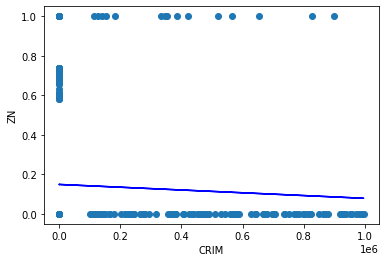

In [ ]:
X = X.reshape(-1,1)
modeloX = LinearRegression()
modeloX.fit(X,S)

Y = Y.reshape(-1,1)
modeloY = LinearRegression()
modeloY.fit(Y,S)

Z = Z.reshape(-1,1)
modeloZ = LinearRegression()
modeloZ.fit(Z,S)

print ("b em X: ", modeloX.intercept_)
print ("a em X: ", modeloX.coef_)

print ("b em Y: ", modeloY.intercept_)
print ("a em Y: ", modeloY.coef_)

print ("b em Z: ", modeloZ.intercept_)
print ("a em Z: ", modeloZ.coef_)

plt.scatter(X,S)
plt.xlabel("CRIM")
plt.ylabel("ZN")
plt.plot(X, modeloX.predict(X),color='blue')

#plt.scatter(Y,D)
#plt.xlabel("ANO")
#plt.ylabel("Preço")
#plt.plot(Y, modeloY.predict(Y),color='red')

#plt.scatter(Z,D)
#plt.xlabel("NUM PORTAS")
#plt.ylabel("Preço")
#plt.plot(Z, modeloZ.predict(Z),color='red')

SRV

In [ ]:
X = base.iloc[:,0:3].values    #KM
S = base.iloc[:,3].values    #Saida
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1).fit(X,S)
saida = svr.predict(X)

rms = sqrt(mean_squared_error(saida, S))
print (rms)

0.17805231461439258


MLP

In [ ]:
X = base.iloc[:,0:3].values    #KM
S = base.iloc[:,3].values    #Saida
regr = MLPRegressor(hidden_layer_sizes=(5,5,5),max_iter=500).fit(X, S)
saida = regr.predict(X)

rms = sqrt(mean_squared_error(saida, S))
print (rms)

1.3478559265706025


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


RF

In [ ]:
X = base.iloc[:,0:3].values    #KM
S = base.iloc[:,3].values    #Saida
RFR = RandomForestRegressor(max_depth=2, random_state=0).fit(X,S)
saida = RFR.predict(X)

rms = sqrt(mean_squared_error(saida, S))
print (rms)

0.24690433323349184


Raiz Quadrada da Média dos Erros (RMSE)

In [ ]:
rms = sqrt(mean_squared_error(saida, S))
print (rms)

0.24690433323349184
